<a href="https://colab.research.google.com/github/theggman/awesome-public-datasets/blob/master/Trabajo3_Aguirre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presentación de grupo
Somos un grupo en busca de retos estadísticos y optimización de datos.

-Preguntas y objetivos
Que variables tienen mayor importancia en la causalidad de un paro cardiaco?

-Conformación de equipo de trabajo

TEAM LEADER
Benjamin Aguirre

COACH
Manuel Aguirre

-Resumen Ejecutivo
												
En este dataset se clasifican los datos sobre ataques al corazon desde una perspectiva analítica/numérica y de la forma más íntegramente posible. El motivo de este estudio es la intriga sobre las variables que pueden ocasionar este problema, lo que vuelve indispensable estudiar cada variabilidad y correlación que pueden tener las anomalías fisiológicas. Por otro lado buscamos realizar predicciones con modelos de machine learning y en base a los resultados se podrían dar avisos sobre este posible problema.


# Sobre este dataset:

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack
'''

In [1]:
#Importamos la librerias
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Data Acquisition

In [2]:
#Importamos los datos
df = pd.read_csv("/content/heart.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data Wrangling

# Exploratory Data Analysis - EDA

In [3]:
#Vemos el dataset
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Dimensión del Dataset
print(df.shape)

(303, 14)


In [5]:
#Verificamos el DataFrame
type(df)

pandas.core.frame.DataFrame

In [6]:
#Insights:
#El dataset se compone de 13 columnas de las cuales 12 corresponden a variables independientes, que usaremos para predecir el target.
#Output es la variable a predecir. Todas las variables son numericas(type: int64/Float64).
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#Analisis estadistico basico
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Análisis Univariado, Bivariado y Multivariado

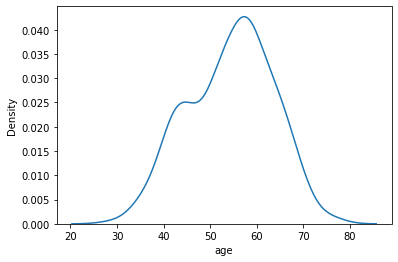

In [12]:
#Histograma
from seaborn import displot
sns.distplot(df.age, hist=False)

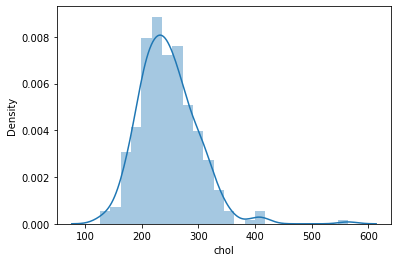

In [17]:
#Analizamos otras variables
sns.distplot(df['chol'])

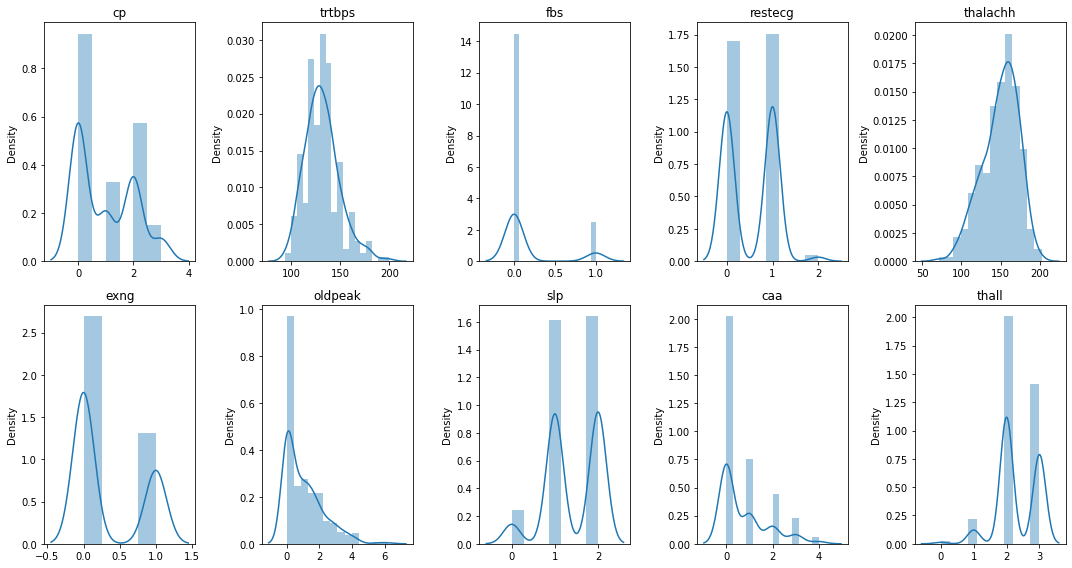

In [30]:
#Visualizamos las variables restantes
variables = ['cp','trtbps','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']

columns = 5

fig, axes = plt.subplots(len(variables) //columns, columns, figsize=(15,8))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.distplot(df[variable], ax=axes[i][j])
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")
    
plt.tight_layout()

Realizando estos graficos podemos tener un vision mas clara sobre los datos elegidos y poder visualizar la distribucion, patrones, simetria o asimetrias.

Text(0.5, 1.0, 'Pacientes potenciales y no potenciales a un problema cardiaco')

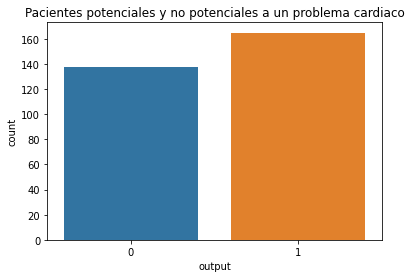

In [10]:
#Realizamos un countplot para ver la cantidad de pacientes potenciales y no potenciales a un problema cardiaco
sns.countplot(df['output'])
df["output"].value_counts()
plt.title('Pacientes potenciales y no potenciales a un problema cardiaco')

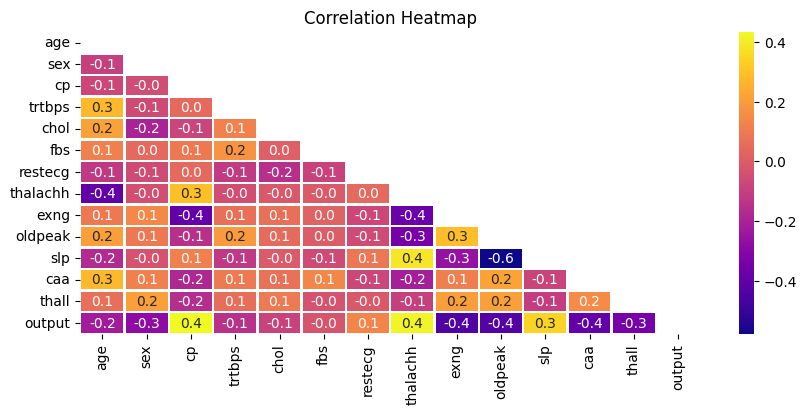

In [11]:
#Identifiar correlaciones entre datos
plt.figure(dpi = 100,figsize= (10,4))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".1f",annot=True,lw=1,cmap = 'plasma')
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

# Implementación de Algoritmos y Machine Learning

In [39]:
#Seperamos en X e y
X = df.drop("output", axis=1) #Elimino de mi dataset la variable a predecir
y = df.output #Defino el Target
type(X)

pandas.core.frame.DataFrame

In [40]:
#Separamos los datos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Metodos de optimizacion y modelamiento de algoritmo de bagging

En este caso decidimos usar el modelo Random Forest. Pudimos realizar una optimizaciones en base a dos métodos de hypertuning Gridsearchcv y Random search CV. Como podrán ver en la primer imagen decidimos usar esos valores y funciones para los hyperparametros de randomforest. 


In [ ]:
#Instranciando modelo de bagging
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier() #Instanciamos el modelo
rf
rf.fit(X_train,y_train)


In [ ]:
#Seleccion de hyperparametros
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = range(1, 5)
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

In [ ]:
rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, verbose=2, n_jobs = -1)

In [ ]:
#Entrenamos el modelo
rf_Grid.fit(X_train, y_train)

In [ ]:
#Visualizar mejores hyperparametros (GridSearch)
rf_Grid.best_params_

In [ ]:
#
rf_RandomGrid = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = -1)

In [ ]:
#Entrenamos el modelo
rf_RandomGrid.fit(X_train, y_train)

In [ ]:
#Visualizar mejores hyperparametros(RandomSearch)
rf_RandomGrid.best_params_

In [ ]:
#Resultado de Grid search en modelo de bagging
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

In [ ]:
#Resultado de Random search en modelo de bagging
print (f'Train Accuracy - : {rf_RandomGrid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,y_test):.3f}')

# Metodos de optimizacion y modelamiento de algoritmo de boosting

In [ ]:
#Empezemos a desarrollar el algoritmo de boosting

#Hyperparametros Gradient Boosting
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
max_depth = range(1, 5)
learning_rate=[0.01,0.1,1,10,100]




In [ ]:
#Armar diccionario sobre hyperparametros
param_gradient = {'n_estimators': n_estimators,
               'max_depth': max_depth,
             'learning_rate':learning_rate
               }
param_gradient

In [ ]:
#Importar y instanciar modelo
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbgs=GridSearchCV(estimator = gbc, param_grid = param_gradient, cv = 10, verbose=2, n_jobs = -1)
#Entrenamos el modelo
gbgs.fit(X_train, y_train)


In [ ]:
#Visualizar mejores hyperparametros
gbgs.best_params_

In [ ]:
#Resultado de Grid search en modelo de boosting
print (f'Train Accuracy - : {gbgs.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {gbgs.score(X_test,y_test):.3f}')

In [ ]:
gbgs_Random = RandomizedSearchCV(estimator = gbc, param_distributions = param_gradient, cv = 10, verbose=2, n_jobs = -1)
#Entrenamos el modelo
gbgs_Random.fit(X_train, y_train)

In [ ]:
gbgs_Random.best_params_

In [ ]:
#Resultado de Random Score en modelo de boosting
print (f'Train Accuracy - : {gbgs_Random.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {gbgs_Random.score(X_test,y_test):.3f}')

In [ ]:
#Comparando los dos modelos
df = pd.DataFrame({'Precision de RandomForest':rf_RandomGrid.score(X_test,y_test) , 'Precision de GBM':gbgs.score(X_test,y_test),},index=[0])
df

# Metodos de optimizacion y algoritmos de agrupamiento


In [ ]:
# Metodo del Codo para encontrar el numero optimo de clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Podemos ver 